In [1]:
import sklearn
import pandas as pd
print(sklearn.__version__)

1.3.0


# Classification

In [2]:
df = pd.read_csv('~/ADNI_Analysis/DTI_with_group.csv')
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()
df

,AD_MCP,AD_PCT,AD_GCC,AD_BCC,AD_SCC,AD_FX,AD_CST_R,AD_CST_L,AD_ML_R,AD_ML_L,...,RD_FXST,RD_SLF,RD_SFO,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,Research Group
0,0.001177,0.000974,0.001479,0.001474,0.001575,0.002257,0.001079,0.001081,0.001285,0.001287,...,0.000662,0.000577,0.000551,0.000600,0.001139,0.000491,0.000562,0.000638,0.000571,CN
2,0.001213,0.001075,0.001567,0.001585,0.001686,0.002492,0.001046,0.001056,0.001149,0.001126,...,0.000769,0.000694,0.000902,0.000717,0.001507,0.000626,0.000701,0.000851,0.000723,CN
3,0.001101,0.000965,0.001440,0.001433,0.001456,0.002379,0.000985,0.000990,0.001118,0.001113,...,0.000614,0.000546,0.000562,0.000553,0.000950,0.000448,0.000512,0.000587,0.000531,CN
4,0.001053,0.000904,0.001433,0.001470,0.001450,0.002421,0.000966,0.000977,0.001047,0.001041,...,0.000607,0.000535,0.000551,0.000530,0.000862,0.000437,0.000509,0.000573,0.000522,CN
5,0.001131,0.000974,0.001469,0.001498,0.001531,0.002291,0.000994,0.001017,0.001128,0.001105,...,0.000621,0.000559,0.000586,0.000558,0.000901,0.000458,0.000527,0.000605,0.000545,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.001117,0.001011,0.001574,0.001646,0.001712,0.002214,0.001094,0.001118,0.001228,0.001248,...,0.000734,0.000647,0.000913,0.000599,0.001623,0.000538,0.000680,0.000744,0.000652,AD
964,0.001181,0.001002,0.001423,0.001505,0.001530,0.002266,0.001088,0.001103,0.001224,0.001203,...,0.000584,0.000593,0.000624,0.000619,0.000878,0.000487,0.000567,0.000618,0.000571,CN
965,0.001126,0.000949,0.001542,0.001747,0.001642,0.002565,0.000978,0.001052,0.001162,0.001190,...,0.000577,0.000589,0.000835,0.000534,0.001478,0.000440,0.000694,0.000659,0.000597,AD
966,0.001090,0.000976,0.001354,0.001421,0.001427,0.001928,0.001018,0.001007,0.001241,0.001188,...,0.000560,0.000517,0.000514,0.000566,0.000729,0.000441,0.000469,0.000534,0.000509,CN


In [3]:
X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values

In [4]:
from numpy import mean
from numpy import std
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 8)

In [6]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=2000, learning_rate=learning_rate, max_depth=5, random_state=8)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 0.604
Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (validation): 0.617
Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.594
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.610
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.571
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.545
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.555


In [8]:
gb_clf2 = GradientBoostingClassifier(n_estimators=8000, learning_rate=0.075, max_depth=5, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[  2   8   2   0   1   0]
 [  3 159   4   0   5   3]
 [  0  24   7   0   2   1]
 [  2  12   2   4   0   1]
 [  0  36   2   0  13   1]
 [  0   9   0   0   1   4]]
Classification Report
              precision    recall  f1-score   support

          AD       0.29      0.15      0.20        13
          CN       0.64      0.91      0.75       174
        EMCI       0.41      0.21      0.27        34
        LMCI       1.00      0.19      0.32        21
         MCI       0.59      0.25      0.35        52
         SMC       0.40      0.29      0.33        14

    accuracy                           0.61       308
   macro avg       0.55      0.33      0.37       308
weighted avg       0.61      0.61      0.56       308



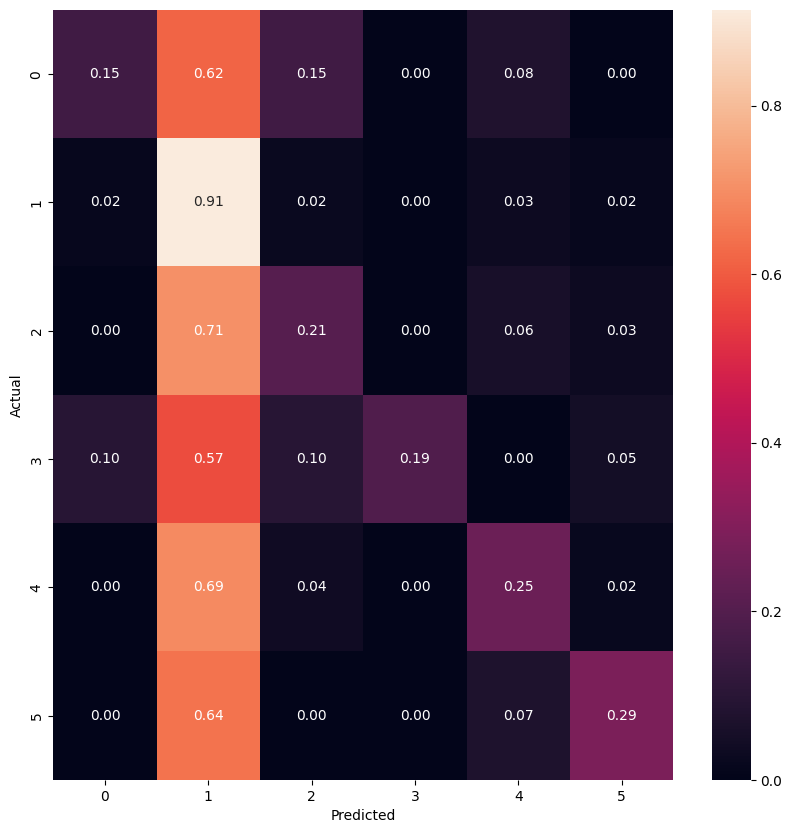

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

## Combined Groups

In [10]:
df = pd.read_csv('~/ADNI_Analysis/DTI_with_group_comb.csv')
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()
df

,AD_MCP,AD_PCT,AD_GCC,AD_BCC,AD_SCC,AD_FX,AD_CST_R,AD_CST_L,AD_ML_R,AD_ML_L,...,RD_FXST,RD_SLF,RD_SFO,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,Research Group
0,0.001177,0.000974,0.001479,0.001474,0.001575,0.002257,0.001079,0.001081,0.001285,0.001287,...,0.000662,0.000577,0.000551,0.000600,0.001139,0.000491,0.000562,0.000638,0.000571,CN
2,0.001213,0.001075,0.001567,0.001585,0.001686,0.002492,0.001046,0.001056,0.001149,0.001126,...,0.000769,0.000694,0.000902,0.000717,0.001507,0.000626,0.000701,0.000851,0.000723,CN
3,0.001101,0.000965,0.001440,0.001433,0.001456,0.002379,0.000985,0.000990,0.001118,0.001113,...,0.000614,0.000546,0.000562,0.000553,0.000950,0.000448,0.000512,0.000587,0.000531,CN
4,0.001053,0.000904,0.001433,0.001470,0.001450,0.002421,0.000966,0.000977,0.001047,0.001041,...,0.000607,0.000535,0.000551,0.000530,0.000862,0.000437,0.000509,0.000573,0.000522,CN
5,0.001131,0.000974,0.001469,0.001498,0.001531,0.002291,0.000994,0.001017,0.001128,0.001105,...,0.000621,0.000559,0.000586,0.000558,0.000901,0.000458,0.000527,0.000605,0.000545,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.001117,0.001011,0.001574,0.001646,0.001712,0.002214,0.001094,0.001118,0.001228,0.001248,...,0.000734,0.000647,0.000913,0.000599,0.001623,0.000538,0.000680,0.000744,0.000652,AD
964,0.001181,0.001002,0.001423,0.001505,0.001530,0.002266,0.001088,0.001103,0.001224,0.001203,...,0.000584,0.000593,0.000624,0.000619,0.000878,0.000487,0.000567,0.000618,0.000571,CN
965,0.001126,0.000949,0.001542,0.001747,0.001642,0.002565,0.000978,0.001052,0.001162,0.001190,...,0.000577,0.000589,0.000835,0.000534,0.001478,0.000440,0.000694,0.000659,0.000597,AD
966,0.001090,0.000976,0.001354,0.001421,0.001427,0.001928,0.001018,0.001007,0.001241,0.001188,...,0.000560,0.000517,0.000514,0.000566,0.000729,0.000441,0.000469,0.000534,0.000509,CN


In [11]:
X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 33)

In [13]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=learning_rate, max_depth=5, random_state=33)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 0.627
Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (validation): 0.633
Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.627
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.630
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.646
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.669
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.640


In [15]:
gb_clf2 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.75, max_depth=5, random_state=33)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[  2   4   6]
 [  2 149  29]
 [  0  61  55]]
Classification Report
              precision    recall  f1-score   support

          AD       0.50      0.17      0.25        12
          CN       0.70      0.83      0.76       180
         MCI       0.61      0.47      0.53       116

    accuracy                           0.67       308
   macro avg       0.60      0.49      0.51       308
weighted avg       0.66      0.67      0.65       308



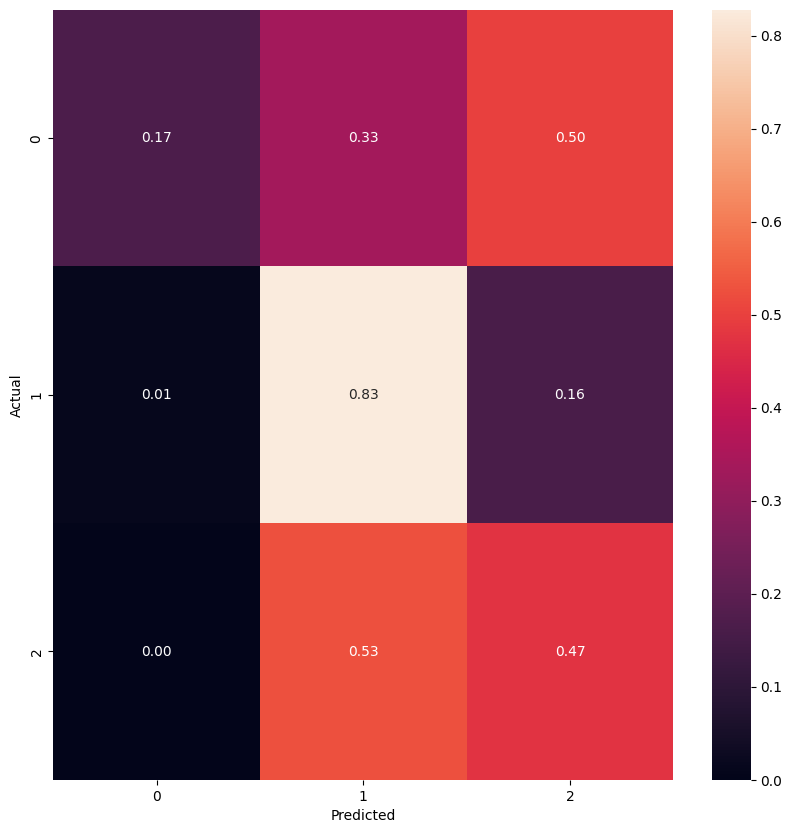

In [16]:
cm = confusion_matrix(y_test, predictions)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

# Regression

In [17]:
df = pd.read_csv('~/ADNI_Analysis/DTI_with_group_num.csv')
df.head(5)

,IMAGEUID,COLPROT,RID,VISCODE,VISCODE2,EXAMDATE,VERSION,MANUFACTURER,VOLUMES,RUNDATE,...,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,update_stamp,Sex,Research Group,Age
0,957753,ADNI3,21,init,m144,1/25/18,2.0,Siemens,55,12/1/21,...,0.000600,0.001139,0.000491,0.000562,0.000638,0.000571,NaN,F,0,84.9
1,987377,ADNI3,31,init,m150,4/17/18,NaN,Siemens,127,12/1/21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,0,90.3
2,1158142,ADNI3,31,y1,m162,4/24/19,2.0,Siemens,127,12/1/21,...,0.000717,0.001507,0.000626,0.000701,0.000851,0.000723,NaN,F,0,91.3
3,1116459,ADNI3,56,y1,m156,1/10/19,2.0,Siemens,127,12/1/21,...,0.000553,0.000950,0.000448,0.000512,0.000587,0.000531,NaN,F,0,82.8
4,1189755,ADNI3,56,init,m144,11/28/17,2.0,Siemens,127,12/1/21,...,0.000530,0.000862,0.000437,0.000509,0.000573,0.000522,NaN,F,0,81.7


In [18]:
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()
df

,AD_MCP,AD_PCT,AD_GCC,AD_BCC,AD_SCC,AD_FX,AD_CST_R,AD_CST_L,AD_ML_R,AD_ML_L,...,RD_FXST,RD_SLF,RD_SFO,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,Research Group
0,0.001177,0.000974,0.001479,0.001474,0.001575,0.002257,0.001079,0.001081,0.001285,0.001287,...,0.000662,0.000577,0.000551,0.000600,0.001139,0.000491,0.000562,0.000638,0.000571,0
2,0.001213,0.001075,0.001567,0.001585,0.001686,0.002492,0.001046,0.001056,0.001149,0.001126,...,0.000769,0.000694,0.000902,0.000717,0.001507,0.000626,0.000701,0.000851,0.000723,0
3,0.001101,0.000965,0.001440,0.001433,0.001456,0.002379,0.000985,0.000990,0.001118,0.001113,...,0.000614,0.000546,0.000562,0.000553,0.000950,0.000448,0.000512,0.000587,0.000531,0
4,0.001053,0.000904,0.001433,0.001470,0.001450,0.002421,0.000966,0.000977,0.001047,0.001041,...,0.000607,0.000535,0.000551,0.000530,0.000862,0.000437,0.000509,0.000573,0.000522,0
5,0.001131,0.000974,0.001469,0.001498,0.001531,0.002291,0.000994,0.001017,0.001128,0.001105,...,0.000621,0.000559,0.000586,0.000558,0.000901,0.000458,0.000527,0.000605,0.000545,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.001117,0.001011,0.001574,0.001646,0.001712,0.002214,0.001094,0.001118,0.001228,0.001248,...,0.000734,0.000647,0.000913,0.000599,0.001623,0.000538,0.000680,0.000744,0.000652,5
964,0.001181,0.001002,0.001423,0.001505,0.001530,0.002266,0.001088,0.001103,0.001224,0.001203,...,0.000584,0.000593,0.000624,0.000619,0.000878,0.000487,0.000567,0.000618,0.000571,0
965,0.001126,0.000949,0.001542,0.001747,0.001642,0.002565,0.000978,0.001052,0.001162,0.001190,...,0.000577,0.000589,0.000835,0.000534,0.001478,0.000440,0.000694,0.000659,0.000597,5
966,0.001090,0.000976,0.001354,0.001421,0.001427,0.001928,0.001018,0.001007,0.001241,0.001188,...,0.000560,0.000517,0.000514,0.000566,0.000729,0.000441,0.000469,0.000534,0.000509,0


In [19]:
X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 125)

In [20]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

for learning_rate in lr_list:
    gb_clf = GradientBoostingRegressor(n_estimators=4000, learning_rate=learning_rate, max_depth=5, random_state=33)
    gb_clf.fit(X_train, y_train)

    predictions = gb_clf.predict(X_test)
    errors = abs(predictions - y_test)
    print('Mean Absolute Error:', round(np.mean(errors), 5))

Mean Absolute Error: 1.18726
Mean Absolute Error: 1.21446
Mean Absolute Error: 1.19775
Mean Absolute Error: 1.20973
Mean Absolute Error: 1.25143
Mean Absolute Error: 1.43174
Mean Absolute Error: 1.66202


## Combined groups

In [22]:
df = pd.read_csv('~/ADNI_Analysis/DTI_with_group_num_comb.csv')
df.head(5)

,IMAGEUID,COLPROT,RID,VISCODE,VISCODE2,EXAMDATE,VERSION,MANUFACTURER,VOLUMES,RUNDATE,...,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,update_stamp,Sex,Research Group,Age
0,957753,ADNI3,21,init,m144,1/25/18,2.0,Siemens,55,12/1/21,...,0.000600,0.001139,0.000491,0.000562,0.000638,0.000571,NaN,F,0,84.9
1,987377,ADNI3,31,init,m150,4/17/18,NaN,Siemens,127,12/1/21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,0,90.3
2,1158142,ADNI3,31,y1,m162,4/24/19,2.0,Siemens,127,12/1/21,...,0.000717,0.001507,0.000626,0.000701,0.000851,0.000723,NaN,F,0,91.3
3,1116459,ADNI3,56,y1,m156,1/10/19,2.0,Siemens,127,12/1/21,...,0.000553,0.000950,0.000448,0.000512,0.000587,0.000531,NaN,F,0,82.8
4,1189755,ADNI3,56,init,m144,11/28/17,2.0,Siemens,127,12/1/21,...,0.000530,0.000862,0.000437,0.000509,0.000573,0.000522,NaN,F,0,81.7


In [23]:
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()
df

,AD_MCP,AD_PCT,AD_GCC,AD_BCC,AD_SCC,AD_FX,AD_CST_R,AD_CST_L,AD_ML_R,AD_ML_L,...,RD_FXST,RD_SLF,RD_SFO,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,Research Group
0,0.001177,0.000974,0.001479,0.001474,0.001575,0.002257,0.001079,0.001081,0.001285,0.001287,...,0.000662,0.000577,0.000551,0.000600,0.001139,0.000491,0.000562,0.000638,0.000571,0
2,0.001213,0.001075,0.001567,0.001585,0.001686,0.002492,0.001046,0.001056,0.001149,0.001126,...,0.000769,0.000694,0.000902,0.000717,0.001507,0.000626,0.000701,0.000851,0.000723,0
3,0.001101,0.000965,0.001440,0.001433,0.001456,0.002379,0.000985,0.000990,0.001118,0.001113,...,0.000614,0.000546,0.000562,0.000553,0.000950,0.000448,0.000512,0.000587,0.000531,0
4,0.001053,0.000904,0.001433,0.001470,0.001450,0.002421,0.000966,0.000977,0.001047,0.001041,...,0.000607,0.000535,0.000551,0.000530,0.000862,0.000437,0.000509,0.000573,0.000522,0
5,0.001131,0.000974,0.001469,0.001498,0.001531,0.002291,0.000994,0.001017,0.001128,0.001105,...,0.000621,0.000559,0.000586,0.000558,0.000901,0.000458,0.000527,0.000605,0.000545,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.001117,0.001011,0.001574,0.001646,0.001712,0.002214,0.001094,0.001118,0.001228,0.001248,...,0.000734,0.000647,0.000913,0.000599,0.001623,0.000538,0.000680,0.000744,0.000652,2
964,0.001181,0.001002,0.001423,0.001505,0.001530,0.002266,0.001088,0.001103,0.001224,0.001203,...,0.000584,0.000593,0.000624,0.000619,0.000878,0.000487,0.000567,0.000618,0.000571,0
965,0.001126,0.000949,0.001542,0.001747,0.001642,0.002565,0.000978,0.001052,0.001162,0.001190,...,0.000577,0.000589,0.000835,0.000534,0.001478,0.000440,0.000694,0.000659,0.000597,2
966,0.001090,0.000976,0.001354,0.001421,0.001427,0.001928,0.001018,0.001007,0.001241,0.001188,...,0.000560,0.000517,0.000514,0.000566,0.000729,0.000441,0.000469,0.000534,0.000509,0


In [24]:
X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 12)

In [25]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

for learning_rate in lr_list:
    gb_clf = GradientBoostingRegressor(n_estimators=1000, learning_rate=learning_rate, max_depth=5, random_state=12)
    gb_clf.fit(X_train, y_train)

    predictions = gb_clf.predict(X_test)
    errors = abs(predictions - y_test)
    print('Mean Absolute Error:', round(np.mean(errors), 5))

Mean Absolute Error: 0.4859
Mean Absolute Error: 0.48868
Mean Absolute Error: 0.48227
Mean Absolute Error: 0.48909
Mean Absolute Error: 0.48774
Mean Absolute Error: 0.5276
Mean Absolute Error: 0.59909
